<a href="https://colab.research.google.com/github/surya4409/venkata/blob/main/ybi_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**


---



# **Objective**

The objective of this project is to develop a movie recommendation system that can predict or filter preferences based on the user's past choices and behaviors. This system will utilize both collaborative filtering and content-based filtering techniques to generate personalized movie recommendations.

1. **Collaborative Filtering**: To build a model that captures the user's past behavior (e.g., movies watched or rated) and similar behaviors of other users. This model will predict and recommend movies that the user may be interested in based on the preferences of similar users.

2. **Content-Based Filtering**: To create a profile of the user's preferences by analyzing discrete characteristics of movies they have previously liked. The system will recommend movies with similar properties to those previously enjoyed by the user.

The system will be implemented using Python and Pandas to provide a practical demonstration of how these techniques can be applied to recommend movies that are most similar to the user's past selections.

# **Data Source**
It is taken from the github of YBI.
Link is https://github.com/YBI-Foundation/Dataset/blob/a6bcba4b6f9b87d8f924df1dacad300785571cfe/Movies%20Recommendation.csv

# **Import Library**

In [3]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
import difflib

In [8]:
!pip install numpy==1.21.2

# **Import Data**

In [9]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')

In [10]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


# **Describe Data**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [12]:
df.shape

(4760, 21)

In [13]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

# **Data Visualization**

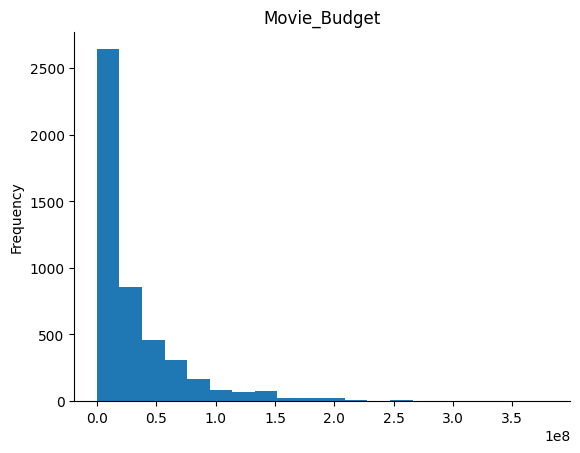

In [14]:
from matplotlib import pyplot as plt
df['Movie_Budget'].plot(kind='hist', bins=20, title='Movie_Budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

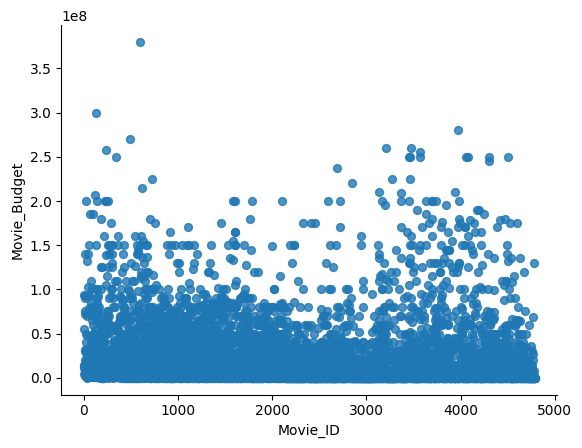

In [15]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Movie_ID', y='Movie_Budget', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

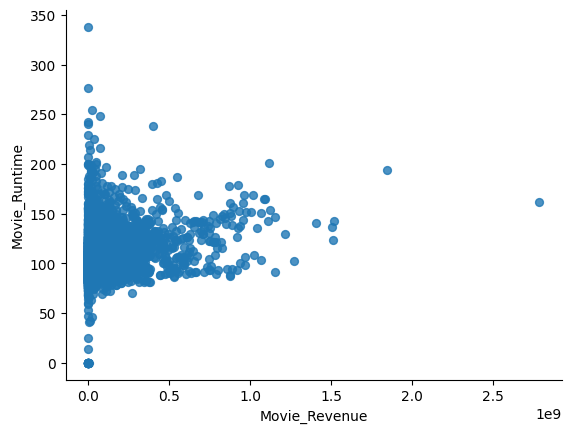

In [16]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Movie_Revenue', y='Movie_Runtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

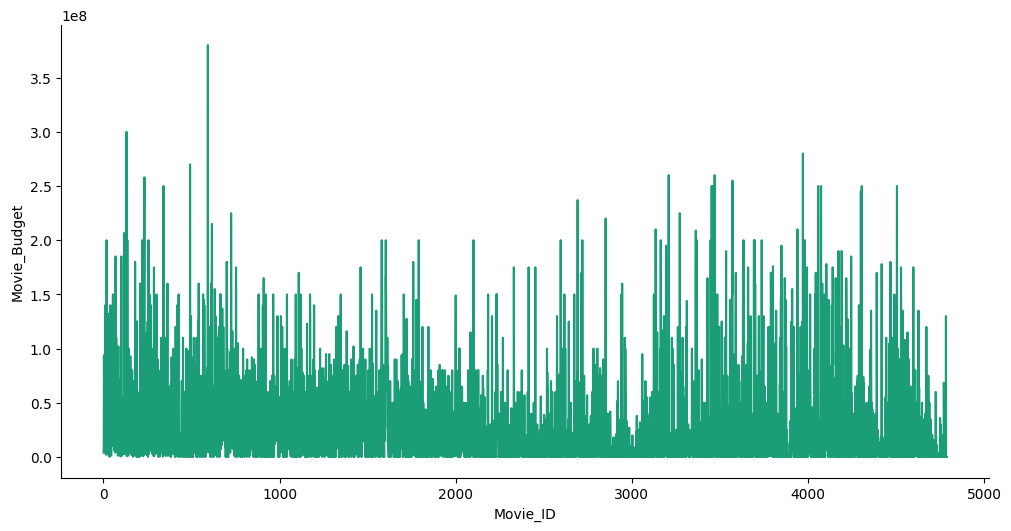

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Movie_ID']
  ys = series['Movie_Budget']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Movie_ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Movie_ID')
_ = plt.ylabel('Movie_Budget')

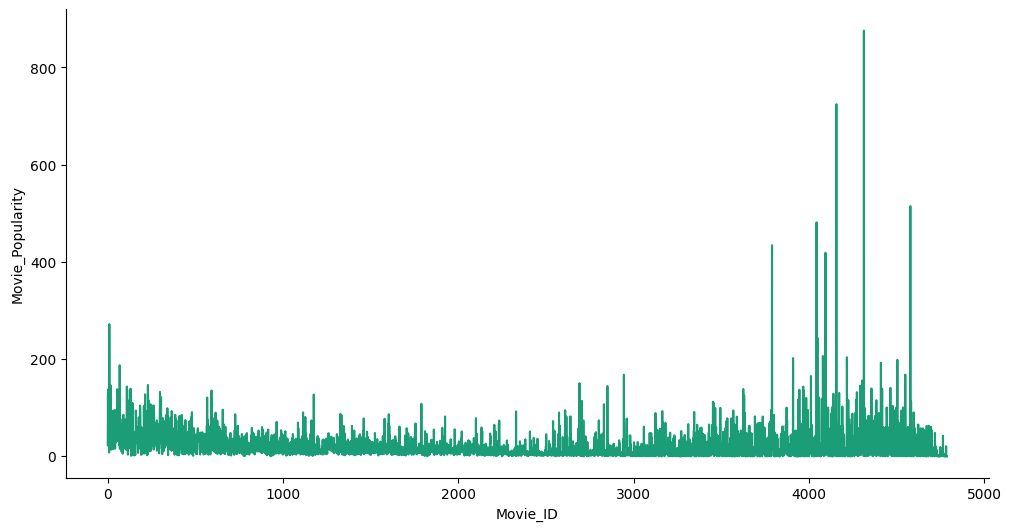

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Movie_ID']
  ys = series['Movie_Popularity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Movie_ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Movie_ID')
_ = plt.ylabel('Movie_Popularity')

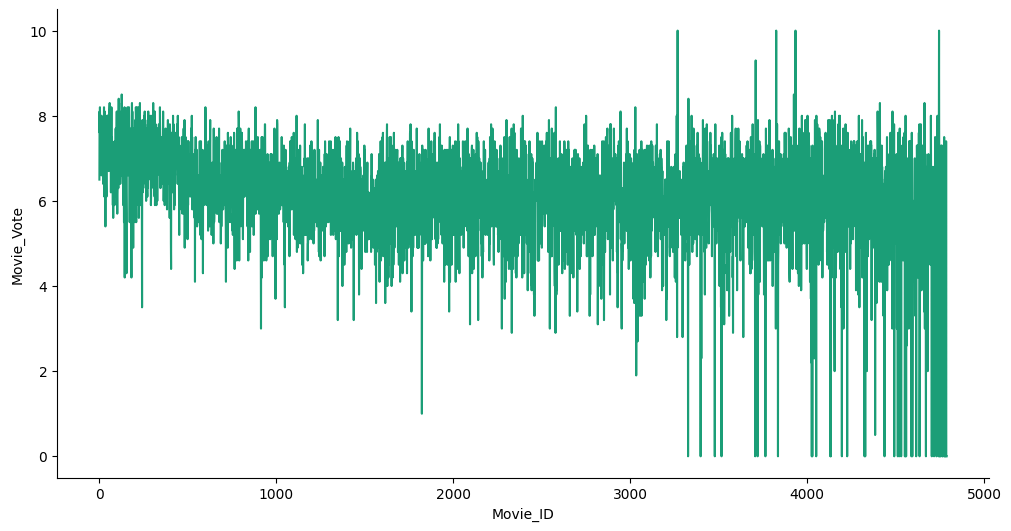

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Movie_ID']
  ys = series['Movie_Vote']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Movie_ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Movie_ID')
_ = plt.ylabel('Movie_Vote')

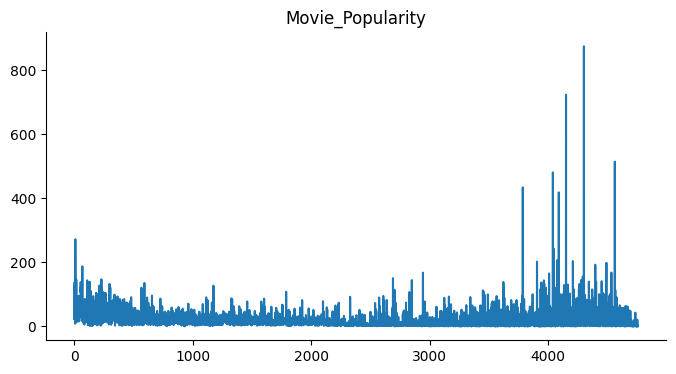

In [20]:
from matplotlib import pyplot as plt
df['Movie_Popularity'].plot(kind='line', figsize=(8, 4), title='Movie_Popularity')
plt.gca().spines[['top', 'right']].set_visible(False)

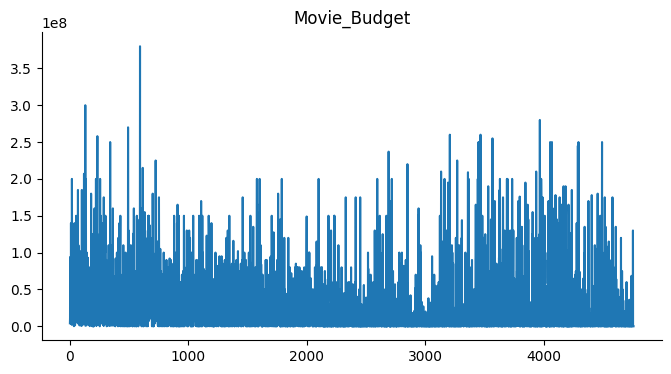

In [21]:
from matplotlib import pyplot as plt
df['Movie_Budget'].plot(kind='line', figsize=(8, 4), title='Movie_Budget')
plt.gca().spines[['top', 'right']].set_visible(False)

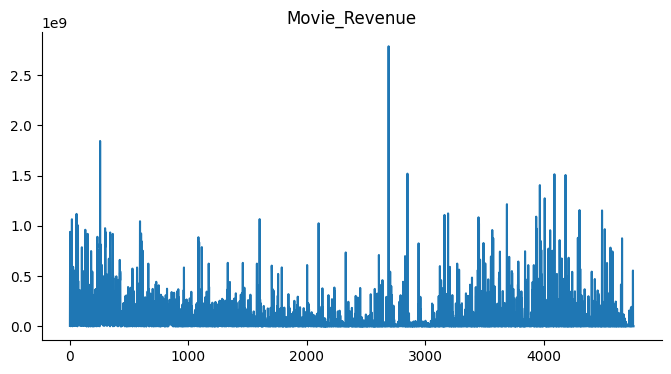

In [22]:
from matplotlib import pyplot as plt
df['Movie_Revenue'].plot(kind='line', figsize=(8, 4), title='Movie_Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Data Preprocessing**

In [23]:
df_features = df[['Movie_Genre','Movie_Keywords','Movie_Tagline','Movie_Cast','Movie_Director']].fillna('')

In [24]:
df_features.shape

(4760, 5)

In [25]:
df_features

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,,,,


# **Define Target Variable (y) and Feature Variables (X)**

In [27]:
x=df_features['Movie_Genre'] + ' ' + df_features['Movie_Keywords'] + ' ' + df_features['Movie_Tagline'] + ' ' + df_features['Movie_Cast'] + ' ' + df_features['Movie_Director']
x

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  The hot spot where Satan's waitin'. Li...
4756    Comedy Family Drama  It’s better to stand out ...
4757    Thriller Drama christian film sex trafficking ...
4758                                           Family    
4759    Documentary music actors legendary perfomer cl...
Length: 4760, dtype: object

In [28]:
x.shape

(4760,)

#**Train Test Split**

In [29]:
tfidf=TfidfVectorizer()

In [30]:
X = tfidf.fit_transform(x)

In [31]:
X.shape

(4760, 17258)

In [32]:
print(X)

  (0, 617)	0.1633382144407513
  (0, 492)	0.1432591540388685
  (0, 15413)	0.1465525095337543
  (0, 9675)	0.14226057295252661
  (0, 9465)	0.1659841367820977
  (0, 1390)	0.16898383612799558
  (0, 7825)	0.09799561597509843
  (0, 1214)	0.13865857545144072
  (0, 729)	0.13415063359531618
  (0, 13093)	0.1432591540388685
  (0, 15355)	0.10477815972666779
  (0, 9048)	0.0866842116160778
  (0, 11161)	0.06250380151644369
  (0, 16773)	0.17654247479915475
  (0, 5612)	0.08603537588547631
  (0, 16735)	0.10690083751525419
  (0, 7904)	0.13348000542112332
  (0, 15219)	0.09800472886453934
  (0, 11242)	0.07277788238484746
  (0, 3878)	0.11998399582562203
  (0, 5499)	0.11454057510303811
  (0, 7071)	0.19822417598406614
  (0, 7454)	0.14745635785412262
  (0, 1495)	0.19712637387361423
  (0, 9206)	0.15186283580984414
  :	:
  (4757, 5455)	0.12491480594769522
  (4757, 2967)	0.16273475835631626
  (4757, 8464)	0.23522565554066333
  (4757, 6938)	0.17088173678136628
  (4757, 8379)	0.17480603856721913
  (4757, 15303)	0.07

# **Modeling**

In [33]:
Similarity_Score = cosine_similarity(X)

In [34]:
Similarity_Score

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [35]:
Similarity_Score.shape

(4760, 4760)

In [37]:
Favorite_Movie_Name = input(' Enter your favorite movie name : ')

 Enter your favorite movie name : Star Wars	


In [38]:
All_Movies_Title_List = df['Movie_Title'].tolist()

In [39]:
Movie_Recommendation = difflib.get_close_matches(Favorite_Movie_Name, All_Movies_Title_List)
print(Movie_Recommendation)

['Star Wars', 'Star Trek', 'State Fair']


In [40]:
Close_Match = Movie_Recommendation[0]
print(Close_Match)

Star Wars


In [41]:
Index_of_Close_Match_Movie = df[df.Movie_Title == Close_Match]['Movie_ID'].values[0]
print(Index_of_Close_Match_Movie)

2


# **Model Evaluation**

In [42]:
# getting a list of similar movies
Recommendation_Score = list(enumerate(Similarity_Score[Index_of_Close_Match_Movie]))
print(Recommendation_Score)

[(0, 0.0357046810425853), (1, 0.00806674385442584), (2, 1.0000000000000004), (3, 0.010521591718659169), (4, 0.0), (5, 0.0), (6, 0.017765821664568825), (7, 0.020459391814520018), (8, 0.0), (9, 0.003691894977938995), (10, 0.017357304877482892), (11, 0.004131279873878878), (12, 0.0042603051915136225), (13, 0.0), (14, 0.0755600401545437), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0038254771243029333), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.030313064953939577), (23, 0.0), (24, 0.043138053214853325), (25, 0.012683619887436534), (26, 0.03985267406354877), (27, 0.035925841296994075), (28, 0.004050565768066834), (29, 0.014601619245802841), (30, 0.016351790950860548), (31, 0.0), (32, 0.009947764091812207), (33, 0.013550651311350111), (34, 0.0), (35, 0.01104363559975108), (36, 0.0), (37, 0.010925836662603832), (38, 0.004559222984603856), (39, 0.00801173739882585), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.023445696195256015), (44, 0.016505753464896276), (45, 0.010891617144621526), (46, 0.0), (47, 0.

In [43]:
len(Recommendation_Score)

4760

In [44]:
Sorted_Similar_Movies = sorted(Recommendation_Score, key = lambda x:x[1], reverse = True)
print(Sorted_Similar_Movies)

[(2, 1.0000000000000004), (1714, 0.1875935306279091), (247, 0.1508193881467258), (3467, 0.14647318067016865), (3162, 0.13915488516680705), (3181, 0.13101873188620575), (709, 0.1283613829617165), (230, 0.12167721115770525), (1473, 0.11824097359319927), (1862, 0.11629897111683916), (3256, 0.11558704877764754), (178, 0.1111468458372592), (2040, 0.10916210938064652), (3390, 0.1073194239226595), (182, 0.10680811738851488), (2647, 0.10610558454863812), (1276, 0.1053435194920348), (4182, 0.10499343399374056), (1834, 0.10460215898310787), (2264, 0.1034495322466014), (1758, 0.1012923348551616), (106, 0.09988059705340357), (1319, 0.0987054551837175), (2135, 0.0984801505547625), (1251, 0.09798035416293525), (2322, 0.09782933850237875), (2897, 0.09714947434738225), (794, 0.09647109437560554), (1182, 0.09527958438829842), (1646, 0.09401965915647889), (1477, 0.09331707969240709), (3660, 0.09156161733706282), (4374, 0.09087169166677278), (2591, 0.09086127146024525), (1886, 0.09022740076397263), (2098

# **Prediction**

In [45]:
print('Top 30 Movies Suggested for you: \n')

i = 1

for movie in Sorted_Similar_Movies:
    index = movie[0]
    title_from_index = df[df.index==index]['Movie_Title'].values[0]
    if (i<31):
        print(i, '.',title_from_index)
        i+=1

Top 30 Movies Suggested for you: 

1 . Finding Nemo
2 . Shark Tale
3 . Big Fish
4 . John Carter
5 . The Muse
6 . Megamind
7 . Mallrats
8 . Spider-Man
9 . Happy Feet
10 . The Last Temptation of Christ
11 . Meet the Deedles
12 . The English Patient
13 . Death Sentence
14 . When Did You Last See Your Father?
15 . The Life Aquatic with Steve Zissou
16 . Flight of the Intruder
17 . El Mariachi
18 . Treading Water
19 . Silent Movie
20 . Bottle Rocket
21 . WALL·E
22 . The Outsiders
23 . He Got Game
24 . Ponyo
25 . American Dreamz
26 . Zoom
27 . Shooting Fish
28 . Bambi
29 . Dear Frankie
30 . Freaky Friday


In [46]:
Movie_Name = input('Enter your favorite movie name: ')

list_of_all_titles = df['Movie_Title'].tolist()

Find_Close_Match = difflib.get_close_matches(Movie_Name, list_of_all_titles)

Close_Match = Find_Close_Match[0]

Index_of_Movie = df[df.Movie_Title == Close_Match]['Movie_ID'].values[0]

Recommendation_Score = list(enumerate(Similarity_Score[Index_of_Movie]))

sorted_similar_movies = sorted(Recommendation_Score, key = lambda x:x[1], reverse = True)

print('Top 10 Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = df[df.Movie_ID==index]['Movie_Title'].values
    if (i<11):
        print(i,'.',title_from_index)
        i+=1


Enter your favorite movie name: Star Wars
Top 10 Movies suggested for you : 

1 . ['Star Wars']
2 . ['Ballistic: Ecks vs. Sever']
3 . ['Wag the Dog']
4 . ['R.I.P.D.']
5 . ['The Tourist']
6 . ['The Adjustment Bureau']
7 . ['Clerks']
8 . ['Fight Club']
9 . ['The Phantom of the Opera']
10 . ['The Barbarian Invasions']


# **Explaination**
The goal of a movie recommendation system is to help users discover movies they might enjoy, based on their past interactions and preferences. By leveraging data on user behavior and movie characteristics, we can create a system that intelligently suggests movies tailored to individual tastes.

Collaborative Filtering is a widely used approach in recommendation systems. It operates on the principle that users who have agreed on items in the past will likely agree again in the future. For example, if two users have rated several movies similarly, the system assumes that they might rate other movies similarly as well. This method builds a model using the user's past activities (like ratings, searches, or purchases) and compares them with other users' activities to find similarities. The system then uses this information to recommend movies that similar users have enjoyed.

Content-Based Filtering focuses on the characteristics of the movies themselves and the user's preferences for those characteristics. By analyzing features such as genre, director, actors, and other attributes of the movies that a user has rated highly, the system can create a profile of the user's tastes. It then recommends movies with similar attributes to those that the user has liked in the past. This method ensures that recommendations are directly aligned with the user's demonstrated interests.

Combining these two techniques provides a robust recommendation system. Collaborative filtering offers insights based on community preferences, while content-based filtering ensures the recommendations are personalized to the user's specific tastes. Implementing this system using Python and Pandas allows for efficient data processing and model building, making it a practical solution for real-world applications. By focusing on these methods, the project aims to create a recommendation system that effectively enhances the user's movie-watching experience.